<a href="https://colab.research.google.com/github/ankashchenko/ankashchenko/blob/main/Single_cell_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets download

In [ ]:
!pip install scanpy[leiden] bbknn harmonypy scrublet
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import bbknn
import scanpy.external as sce

In [ ]:
# Human dataset download
! wget https://cf.10xgenomics.com/samples/cell-exp/4.0.0/Parent_NGSC3_DI_PBMC/Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5

# Read human dataset (Homo sapiens)
human_adata = sc.read_10x_h5('/content/Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5')

# Make genes unique
human_adata.var_names_make_unique()

human_adata

--2023-12-13 18:55:19--  https://cf.10xgenomics.com/samples/cell-exp/4.0.0/Parent_NGSC3_DI_PBMC/Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35470290 (34M) [binary/octet-stream]
Saving to: ‘Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5.4’

Parent_NGSC3_DI_PBM 100%[===================>]  33.83M   173MB/s    in 0.2s    

2023-12-13 18:55:19 (173 MB/s) - ‘Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5.4’ saved [35470290/35470290]



/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 10194 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [ ]:
# Mouse dataset download
!wget https://cf.10xgenomics.com/samples/cell-exp/6.0.0/SC3_v3_NextGem_DI_CellPlex_Mouse_PBMC_10K_PBMCs_mouse_1/SC3_v3_NextGem_DI_CellPlex_Mouse_PBMC_10K_PBMCs_mouse_1_count_sample_feature_bc_matrix.h5

# Read mouse dataset
mouse_adata = sc.read_10x_h5('/content/SC3_v3_NextGem_DI_CellPlex_Mouse_PBMC_10K_PBMCs_mouse_1_count_sample_feature_bc_matrix.h5')

# Make genes unique
mouse_adata.var_names_make_unique()

mouse_adata

--2023-12-13 18:58:33--  https://cf.10xgenomics.com/samples/cell-exp/6.0.0/SC3_v3_NextGem_DI_CellPlex_Mouse_PBMC_10K_PBMCs_mouse_1/SC3_v3_NextGem_DI_CellPlex_Mouse_PBMC_10K_PBMCs_mouse_1_count_sample_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11746926 (11M) [binary/octet-stream]
Saving to: ‘SC3_v3_NextGem_DI_CellPlex_Mouse_PBMC_10K_PBMCs_mouse_1_count_sample_feature_bc_matrix.h5.8’

SC3_v3_NextGem_DI_C 100%[===================>]  11.20M  --.-KB/s    in 0.1s    

2023-12-13 18:58:34 (105 MB/s) - ‘SC3_v3_NextGem_DI_CellPlex_Mouse_PBMC_10K_PBMCs_mouse_1_count_sample_feature_bc_matrix.h5.8’ saved [11746926/11746926]



/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4598 × 32285
    var: 'gene_ids', 'feature_types', 'genome'

# Quality control

## Mouse dataset

Text(0.5, 0.98, 'Quality control, murine dataset')

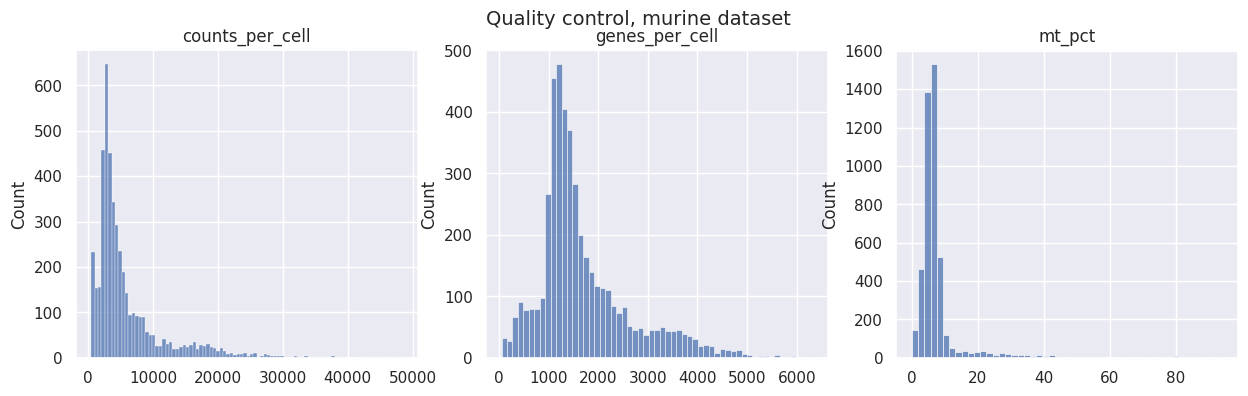

In [ ]:
# counts per cell
counts_per_cell_m = mouse_adata.X.sum(axis=1).T.A[0]

# genes per cell
genes_per_cell_m = (mouse_adata.X > 0).sum(axis=1).T.A[0]


# mt genes per cell
mouse_adata.var["mt"] = mouse_adata.var.index.str.startswith("mt-")
mt_counts_per_cell_m = mouse_adata[:, mouse_adata.var.mt].X.sum(axis=1).T.A[0]
mt_pct_m = mt_counts_per_cell_m/counts_per_cell_m * 100

# Histogram
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax1 = sns.histplot(ax=axes[0], data=counts_per_cell_m)
axes[0].set_title('counts_per_cell')
ax2 = sns.histplot(ax=axes[1], data=genes_per_cell_m)
axes[1].set_title('genes_per_cell')
ax3 = sns.histplot(ax=axes[2], data=mt_pct_m, bins=50)
axes[2].set_title('mt_pct')
fig.suptitle('Quality control, murine dataset', fontsize=14)

### Logarithmic coordinates

In [ ]:
sc.pp.calculate_qc_metrics(
    mouse_adata,
    qc_vars=["mt"],
    percent_top=None,
    inplace=True,
    log1p=False,
)

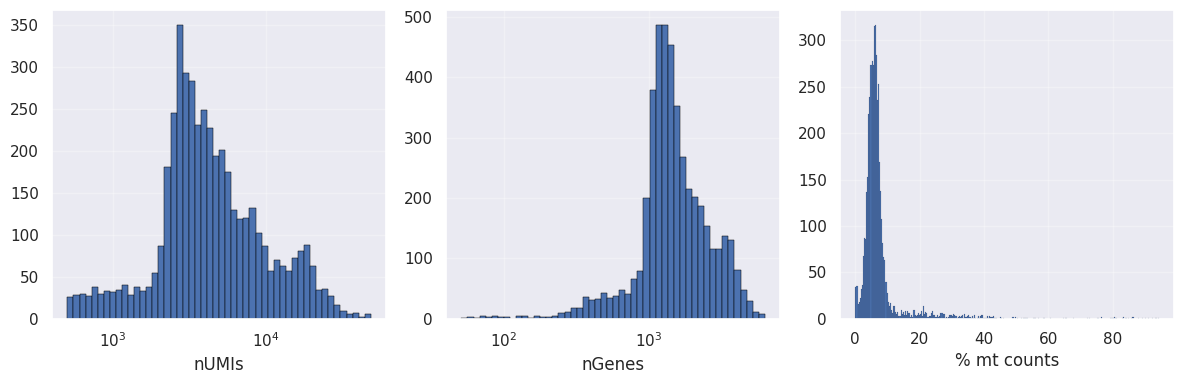

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

sns.histplot(mouse_adata.obs.total_counts, log_scale=True, alpha=1, bins=50, edgecolor="black", ax=axes[0])
axes[0].set_ylabel("")
axes[0].set_xlabel("nUMIs")
axes[0].grid(alpha=0.3)

sns.histplot(mouse_adata.obs.n_genes_by_counts, log_scale=True, alpha=1, bins=50, edgecolor="black", ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("nGenes")
axes[1].grid(alpha=0.3)

sns.histplot(mouse_adata.obs.pct_counts_mt, alpha=1, edgecolor="black", ax=axes[2])
axes[2].set_ylabel("")
axes[2].set_xlabel("% mt counts")
axes[2].grid(alpha=0.3)

fig.tight_layout()

We can adjust % of mitochondrial genes and nUMI per cell

In [ ]:
mouse_adata = mouse_adata[mouse_adata.obs.pct_counts_mt < 15]
mouse_adata = mouse_adata[mouse_adata.obs.total_counts > 1000]

Result:

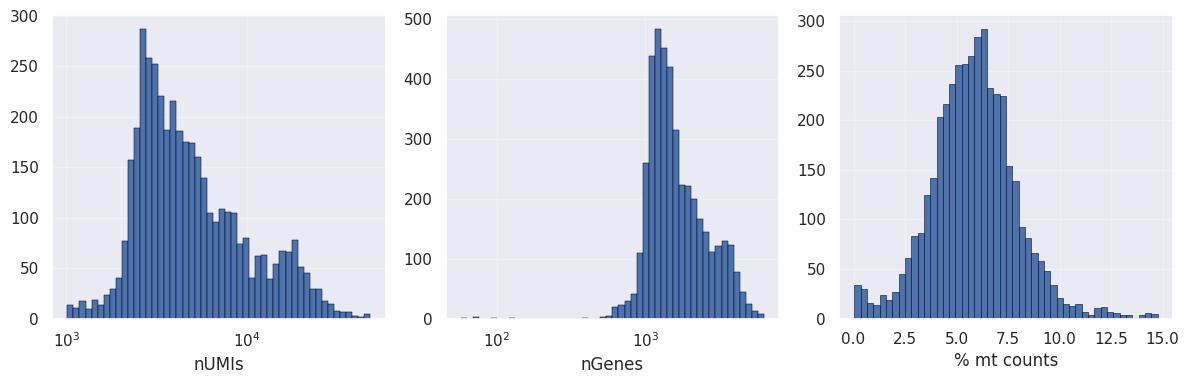

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

sns.histplot(mouse_adata.obs.total_counts, log_scale=True, alpha=1, bins=50, edgecolor="black", ax=axes[0])
axes[0].set_ylabel("")
axes[0].set_xlabel("nUMIs")
axes[0].grid(alpha=0.3)

sns.histplot(mouse_adata.obs.n_genes_by_counts, log_scale=True, alpha=1, bins=50, edgecolor="black", ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("nGenes")
axes[1].grid(alpha=0.3)

sns.histplot(mouse_adata.obs.pct_counts_mt, alpha=1, edgecolor="black", ax=axes[2])
axes[2].set_ylabel("")
axes[2].set_xlabel("% mt counts")
axes[2].grid(alpha=0.3)

fig.tight_layout()

## Human dataset

Text(0.5, 0.98, 'Quality control, human dataset')

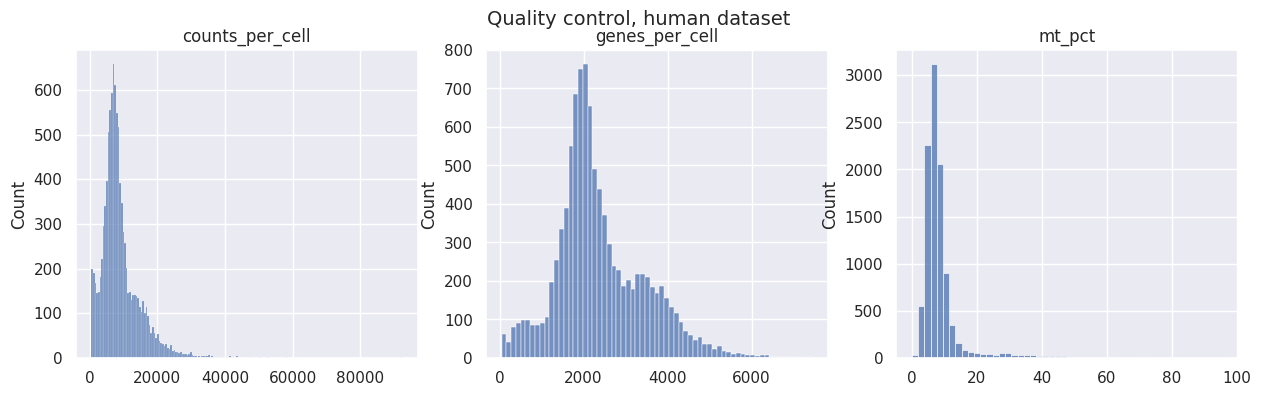

In [ ]:
# counts per cell
counts_per_cell_h = human_adata.X.sum(axis=1).T.A[0]

# genes per cell
genes_per_cell_h = (human_adata.X > 0).sum(axis=1).T.A[0]

# mt genes per cell
human_adata.var["mt"] = human_adata.var.index.str.startswith("MT-")
mt_counts_per_cell_h = human_adata[:, human_adata.var.mt].X.sum(axis=1).T.A[0]
mt_pct_h = mt_counts_per_cell_h/counts_per_cell_h * 100

# Histogram
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.set()
ax1 = sns.histplot(ax=axes[0], data=counts_per_cell_h)
axes[0].set_title('counts_per_cell')
ax2 = sns.histplot(ax=axes[1], data=genes_per_cell_h)
axes[1].set_title('genes_per_cell')
ax3 = sns.histplot(ax=axes[2], data=mt_pct_h, bins=50)
axes[2].set_title('mt_pct')
fig.suptitle('Quality control, human dataset', fontsize=14)

### Logarithmic coordinates

In [ ]:
sc.pp.calculate_qc_metrics(
    human_adata,
    qc_vars=["mt"],
    percent_top=None,
    inplace=True,
    log1p=False,
)

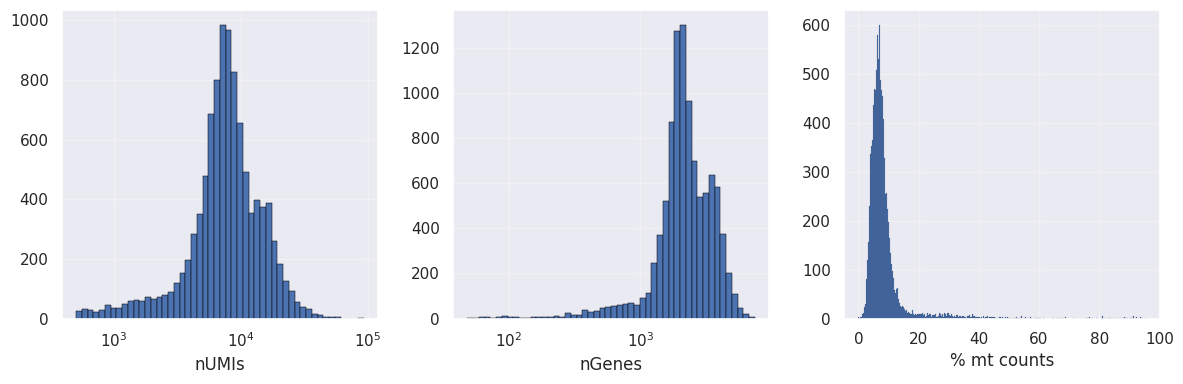

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

sns.histplot(human_adata.obs.total_counts, log_scale=True, alpha=1, bins=50, edgecolor="black", ax=axes[0])
axes[0].set_ylabel("")
axes[0].set_xlabel("nUMIs")
axes[0].grid(alpha=0.3)

sns.histplot(human_adata.obs.n_genes_by_counts, log_scale=True, alpha=1, bins=50, edgecolor="black", ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("nGenes")
axes[1].grid(alpha=0.3)

sns.histplot(human_adata.obs.pct_counts_mt, alpha=1, edgecolor="black", ax=axes[2])
axes[2].set_ylabel("")
axes[2].set_xlabel("% mt counts")
axes[2].grid(alpha=0.3)

fig.tight_layout()

We can adjust % of mitochondrial genes and nUMI per cell

In [ ]:
human_adata = human_adata[human_adata.obs.pct_counts_mt < 15]
human_adata = human_adata[human_adata.obs.total_counts > 1000]

Result:

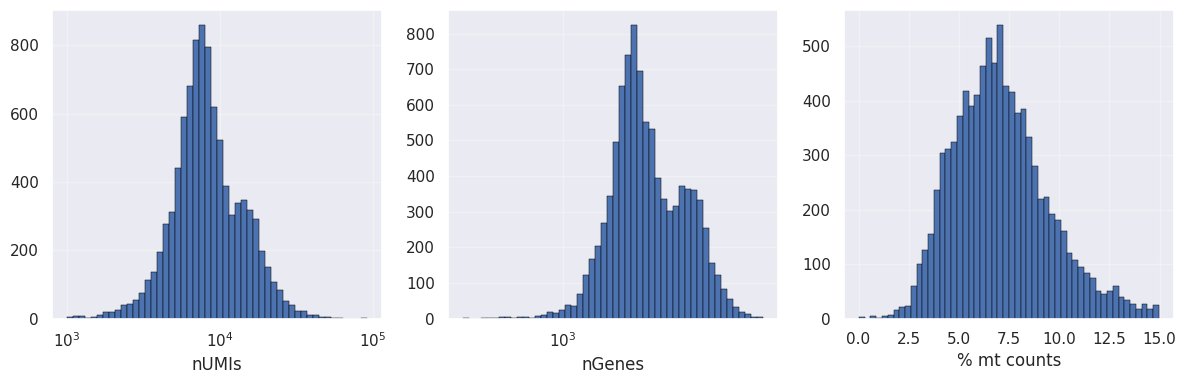

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

sns.histplot(human_adata.obs.total_counts, log_scale=True, alpha=1, bins=50, edgecolor="black", ax=axes[0])
axes[0].set_ylabel("")
axes[0].set_xlabel("nUMIs")
axes[0].grid(alpha=0.3)

sns.histplot(human_adata.obs.n_genes_by_counts, log_scale=True, alpha=1, bins=50, edgecolor="black", ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("nGenes")
axes[1].grid(alpha=0.3)

sns.histplot(human_adata.obs.pct_counts_mt, alpha=1, edgecolor="black", ax=axes[2])
axes[2].set_ylabel("")
axes[2].set_xlabel("% mt counts")
axes[2].grid(alpha=0.3)

fig.tight_layout()

## Find the doublets in the datasets

In [ ]:
# Mark the doublets
sce.pp.scrublet(human_adata)
sce.pp.scrublet(mouse_adata)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.19
Detected doublet rate = 5.4%
Estimated detectable doublet fraction = 51.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 10.4%


/usr/local/lib/python3.10/dist-packages/scanpy/external/pp/_scrublet.py:267: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 34.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.9%


/usr/local/lib/python3.10/dist-packages/scanpy/external/pp/_scrublet.py:267: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']


## *diagnostics graphics

Text(0.5, 0.98, 'Human dataset')

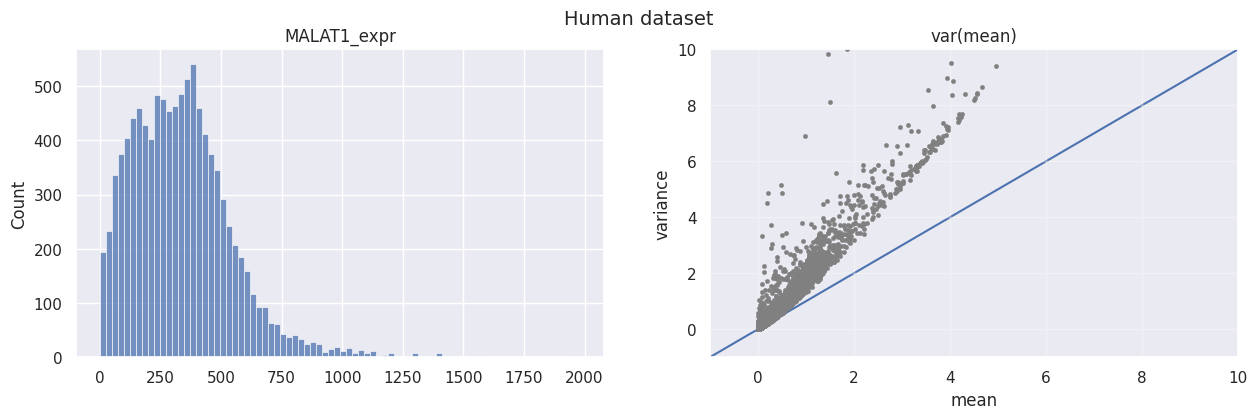

In [ ]:
# Expression of LncRNA in human cells
MALAT1_expr = human_adata[:, "MALAT1"].X.A.T[0]

# mean and variance values
mean = human_adata.X.mean(axis=0).A[0]
variance = np.var(human_adata.X.A, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
ax1 = sns.histplot(ax=axes[0], data=MALAT1_expr)
axes[0].set_title('MALAT1_expr')
ax2 = sns.scatterplot(
    x=np.log(mean + 1),
    y=np.log(variance + 1),
    edgecolor=None,
    color="grey",
    s=10,
)
axes[1].set_title('var(mean)')
axes[1].plot([-10, 20], [-10, 20], zorder=-2)
axes[1].set_xlim(-1, 10)
axes[1].set_ylim(-1, 10)
axes[1].grid(alpha=0.3)
axes[1].set_xlabel('mean')
axes[1].set_ylabel('variance')

fig.suptitle('Human dataset', fontsize=14)

Text(0.5, 0.98, 'Mouse dataset')

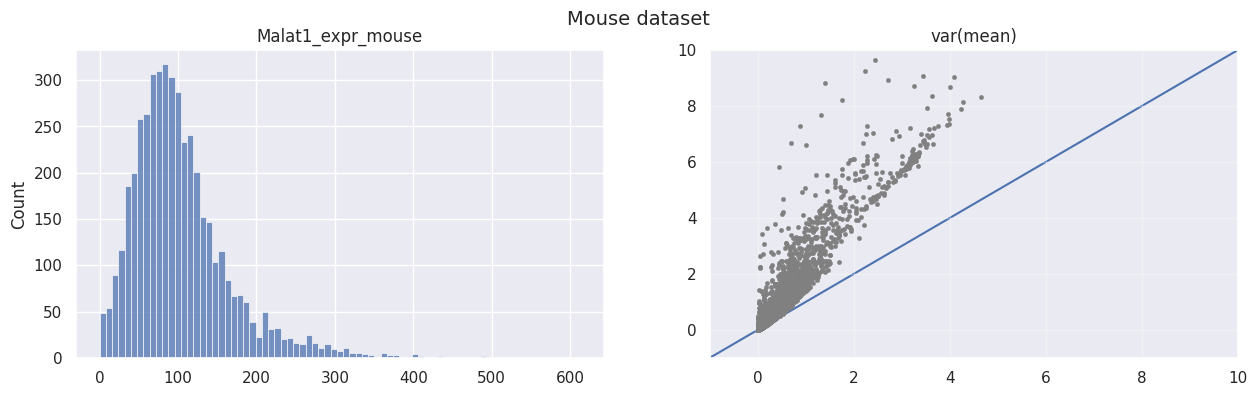

In [ ]:
# Expression of LncRNA in murine cells
MALAT1_expr_mouse = mouse_adata[:, "Malat1"].X.A.T[0]

# mean and variance values
mean_mouse = mouse_adata.X.mean(axis=0).A[0]
variance_mouse = np.var(mouse_adata.X.A, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
ax1 = sns.histplot(ax=axes[0], data=MALAT1_expr_mouse)
axes[0].set_title('Malat1_expr_mouse')
ax2 = sns.scatterplot(
    x=np.log(mean_mouse + 1),
    y=np.log(variance_mouse + 1),
    edgecolor=None,
    color="grey",
    s=10,
)
axes[1].set_title('var(mean)')
axes[1].plot([-10, 20], [-10, 20], zorder=-2)
axes[1].set_xlim(-1, 10)
axes[1].set_ylim(-1, 10)
axes[1].grid(alpha=0.3)
fig.suptitle('Mouse dataset', fontsize=14)

# one-to-one orthologs

Via [OMA Browser](https://omabrowser.org/oma/genomePW/) got the list of 1-to-1 orthologs

In [ ]:
import gdown
# download the ortholog table obtained from OMA
url = 'https://drive.google.com/uc?export=download&id=1zNWeMdmRKghVnHWeom9DhKj5r7P9dzsF'
output = 'orthologs.csv'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?export=download&id=1zNWeMdmRKghVnHWeom9DhKj5r7P9dzsF
To: /content/orthologs.csv
100%|██████████| 693k/693k [00:00<00:00, 43.6MB/s]


'orthologs.csv'

In [ ]:
orthologs = pd.read_csv('/content/orthologs.csv', sep=';')
orthologs

Human_gene_id       Mouse_gene_id relation
0      ENSG00000015171  ENSMUSG00000021156   1 to 1
1      ENSG00000151240  ENSMUSG00000048264   1 to 1
2      ENSG00000107929  ENSMUSG00000033499   1 to 1
3      ENSG00000107937  ENSMUSG00000021149   1 to 1
4      ENSG00000067064  ENSMUSG00000058258   1 to 1
...                ...                 ...      ...
16105  ENSG00000185515  ENSMUSG00000031201   1 to 1
16106  ENSG00000155959  ENSMUSG00000031197   1 to 1
16107  ENSG00000155961  ENSMUSG00000031202   1 to 1
16108  ENSG00000124334  ENSMUSG00000020279   1 to 1
16109  ENSG00000067048  ENSMUSG00000069045   1 to 1

[16110 rows x 3 columns]

Write a function to mark orthologs in the datasets=

In [ ]:
def ortholog_filter_mouse(x):
    '''
    Function returns True if a gene is an ortholog
    '''
    if x in list(orthologs['Mouse_gene_id']):
        return True
    else:
        return False


In [ ]:
def ortholog_filter_human(x):
    '''
    Function returns True if a gene is an ortholog
    '''
    if x in list(orthologs['Human_gene_id']):
        return True
    else:
        return False

In [ ]:
# make a column for orthologs marking
mouse_adata.var['ortholog_mouse'] =  mouse_adata.var.gene_ids.map(ortholog_filter_mouse)
human_adata.var['ortholog_human'] =  human_adata.var.gene_ids.map(ortholog_filter_human)

In [ ]:
# Filtering
# Murine orthologs:
murine_ort_num = len(mouse_adata.var['ortholog_mouse'][mouse_adata.var['ortholog_mouse'] == True])
print(f'{len(mouse_adata.var)} of genes from murine dataset (of total {murine_ort_num} genes) are orthologs')

# Human orthologs:
human_ort_num = len(human_adata.var['ortholog_human'][human_adata.var['ortholog_human'] == True])
print(f'{len(human_adata.var)} of genes from human dataset (of total {human_ort_num} genes) are orthologs')

Из 32285 генов в датасете мыши 16052 являются ортологами человеческих генов
Из 36601 генов в датасете человека 16066 являются ортологами мышиных генов


In [ ]:
# adding a column with spiecies
human_adata.obs["Organism"] = "Human"
mouse_adata.obs["Organism"] = "Mouse"

In [ ]:
# Rename the murine genes to merge the datasets further
names = mouse_adata.var_names
new_names = []

for el in names:
    el = el.upper()
    new_names.append(el)

mouse_adata.var_names = new_names
# new_names

# Merging the datasets

In [ ]:
merged_adata = human_adata.concatenate(mouse_adata, join='inner', index_unique='-')

<ipython-input-406-4531a1ba2bbc>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  merged_adata = human_adata.concatenate(mouse_adata, join='inner', index_unique='-')


In [ ]:
merged_adata

AnnData object with n_obs × n_vars = 13567 × 16284
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'Organism', 'batch'
    var: 'feature_types', 'mt', 'gene_ids-0', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'ortholog_human-0', 'gene_ids-1', 'genome-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'ortholog_mouse-1'

In [ ]:
merged_adata.var

feature_types     mt       gene_ids-0 genome-0  \
SAMD11   Gene Expression  False  ENSG00000187634   GRCh38   
NOC2L    Gene Expression  False  ENSG00000188976   GRCh38   
PLEKHN1  Gene Expression  False  ENSG00000187583   GRCh38   
PERM1    Gene Expression  False  ENSG00000187642   GRCh38   
ISG15    Gene Expression  False  ENSG00000187608   GRCh38   
...                  ...    ...              ...      ...   
MT-ND3   Gene Expression   True  ENSG00000198840   GRCh38   
MT-ND4L  Gene Expression   True  ENSG00000212907   GRCh38   
MT-ND4   Gene Expression   True  ENSG00000198886   GRCh38   
MT-ND5   Gene Expression   True  ENSG00000198786   GRCh38   
MT-ND6   Gene Expression   True  ENSG00000198695   GRCh38   

         n_cells_by_counts-0  mean_counts-0  pct_dropout_by_counts-0  \
SAMD11                     6       0.000589                99.941142   
NOC2L                   2648       0.326663                74.023936   
PLEKHN1                   84       0.010006                99.175986   
PERM1                      3       0.000294                99.970571   
ISG15                   5881       2.550912                42.309201   
...                      ...            ...                      ...   
MT-ND3                 10181      42.920444                 0.127526   
MT-ND4L                 7099       1.555621                30.360997   
MT-ND4                 10190      63.442417                 0.039239   
MT-ND5                 10160      17.362762                 0.333530   
MT-ND6                  3111       0.422994                69.482048   

         total_counts-0  ortholog_human-0          gene_ids-1 genome-1  \
SAMD11              6.0              True  ENSMUSG00000096351     mm10   
NOC2L            3330.0              True  ENSMUSG00000095567     mm10   
PLEKHN1           102.0              True  ENSMUSG00000078485     mm10   
PERM1               3.0              True  ENSMUSG00000078486     mm10   
ISG15           26004.0              True  ENSMUSG00000035692     mm10   
...                 ...               ...                 ...      ...   
MT-ND3         437531.0              True  ENSMUSG00000064360     mm10   
MT-ND4L         15858.0              True  ENSMUSG00000065947     mm10   
MT-ND4         646732.0              True  ENSMUSG00000064363     mm10   
MT-ND5         176996.0              True  ENSMUSG00000064367     mm10   
MT-ND6           4312.0              True  ENSMUSG00000064368     mm10   

         n_cells_by_counts-1  mean_counts-1  pct_dropout_by_counts-1  \
SAMD11                     8       0.002392                99.826011   
NOC2L                    945       0.270552                79.447586   
PLEKHN1                  176       0.039800                96.172249   
PERM1                      1       0.000217                99.978251   
ISG15                    750       0.678121                83.688560   
...                      ...            ...                      ...   
MT-ND3                  4297       5.976946                 6.546324   
MT-ND4L                 2901       1.411918                36.907351   
MT-ND4                  4545      20.821444                 1.152675   
MT-ND5                  4034       3.488908                12.266203   
MT-ND6                   714       0.180731                84.471509   

         total_counts-1  ortholog_mouse-1  
SAMD11             11.0              True  
NOC2L            1244.0              True  
PLEKHN1           183.0              True  
PERM1               1.0              True  
ISG15            3118.0              True  
...                 ...               ...  
MT-ND3          27482.0              True  
MT-ND4L          6492.0              True  
MT-ND4          95737.0              True  
MT-ND5          16042.0              True  
MT-ND6            831.0              True  

[16284 rows x 16 columns]

In [ ]:
# download the names of orthologs (not the IDs)
import gdown
url = 'https://drive.google.com/uc?export=download&id=1ZM1_bSBAcy_P7DUI3ENTSA9bKmjXrJTd'
output = 'orthologs_names.txt'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?export=download&id=1ZM1_bSBAcy_P7DUI3ENTSA9bKmjXrJTd
To: /content/orthologs_names.txt
100%|██████████| 119k/119k [00:00<00:00, 51.6MB/s]


'orthologs_names.txt'

In [ ]:
gene_names = []
with open('/content/orthologs_names.txt') as names:
    names.readline()
    for line in names:
        gene_names.append(line.strip())

Leave only prthologs comparing with the downloaded list

In [ ]:
merged_adata = merged_adata[:, merged_adata.var_names.isin(gene_names)]

In [ ]:
merged_adata.var

feature_types     mt       gene_ids-0 genome-0  \
SAMD11   Gene Expression  False  ENSG00000187634   GRCh38   
NOC2L    Gene Expression  False  ENSG00000188976   GRCh38   
PLEKHN1  Gene Expression  False  ENSG00000187583   GRCh38   
PERM1    Gene Expression  False  ENSG00000187642   GRCh38   
ISG15    Gene Expression  False  ENSG00000187608   GRCh38   
...                  ...    ...              ...      ...   
MT-ND3   Gene Expression   True  ENSG00000198840   GRCh38   
MT-ND4L  Gene Expression   True  ENSG00000212907   GRCh38   
MT-ND4   Gene Expression   True  ENSG00000198886   GRCh38   
MT-ND5   Gene Expression   True  ENSG00000198786   GRCh38   
MT-ND6   Gene Expression   True  ENSG00000198695   GRCh38   

         n_cells_by_counts-0  mean_counts-0  pct_dropout_by_counts-0  \
SAMD11                     6       0.000589                99.941142   
NOC2L                   2648       0.326663                74.023936   
PLEKHN1                   84       0.010006                99.175986   
PERM1                      3       0.000294                99.970571   
ISG15                   5881       2.550912                42.309201   
...                      ...            ...                      ...   
MT-ND3                 10181      42.920444                 0.127526   
MT-ND4L                 7099       1.555621                30.360997   
MT-ND4                 10190      63.442417                 0.039239   
MT-ND5                 10160      17.362762                 0.333530   
MT-ND6                  3111       0.422994                69.482048   

         total_counts-0  ortholog_human-0          gene_ids-1 genome-1  \
SAMD11              6.0              True  ENSMUSG00000096351     mm10   
NOC2L            3330.0              True  ENSMUSG00000095567     mm10   
PLEKHN1           102.0              True  ENSMUSG00000078485     mm10   
PERM1               3.0              True  ENSMUSG00000078486     mm10   
ISG15           26004.0              True  ENSMUSG00000035692     mm10   
...                 ...               ...                 ...      ...   
MT-ND3         437531.0              True  ENSMUSG00000064360     mm10   
MT-ND4L         15858.0              True  ENSMUSG00000065947     mm10   
MT-ND4         646732.0              True  ENSMUSG00000064363     mm10   
MT-ND5         176996.0              True  ENSMUSG00000064367     mm10   
MT-ND6           4312.0              True  ENSMUSG00000064368     mm10   

         n_cells_by_counts-1  mean_counts-1  pct_dropout_by_counts-1  \
SAMD11                     8       0.002392                99.826011   
NOC2L                    945       0.270552                79.447586   
PLEKHN1                  176       0.039800                96.172249   
PERM1                      1       0.000217                99.978251   
ISG15                    750       0.678121                83.688560   
...                      ...            ...                      ...   
MT-ND3                  4297       5.976946                 6.546324   
MT-ND4L                 2901       1.411918                36.907351   
MT-ND4                  4545      20.821444                 1.152675   
MT-ND5                  4034       3.488908                12.266203   
MT-ND6                   714       0.180731                84.471509   

         total_counts-1  ortholog_mouse-1  
SAMD11             11.0              True  
NOC2L            1244.0              True  
PLEKHN1           183.0              True  
PERM1               1.0              True  
ISG15            3118.0              True  
...                 ...               ...  
MT-ND3          27482.0              True  
MT-ND4L          6492.0              True  
MT-ND4          95737.0              True  
MT-ND5          16042.0              True  
MT-ND6            831.0              True  

[14834 rows x 16 columns]

Normalization after merging

In [ ]:
# Filtering, normalization and logarighmize the data
sc.pp.filter_genes(merged_adata, min_cells=3)  # Filter genes expressed in at least 3 cells
sc.pp.normalize_total(merged_adata, target_sum=1e4)  # Normalize total counts
sc.pp.log1p(merged_adata)  # Logarithmize the data

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [ ]:
# Check
merged_adata.X.max()

8.706125

# Mark the highly variable genes

In [ ]:
sc.pp.highly_variable_genes(merged_adata, n_top_genes=3000, batch_key='Organism')

In [ ]:
merged_adata.var

feature_types     mt       gene_ids-0 genome-0  \
SAMD11   Gene Expression  False  ENSG00000187634   GRCh38   
NOC2L    Gene Expression  False  ENSG00000188976   GRCh38   
PLEKHN1  Gene Expression  False  ENSG00000187583   GRCh38   
PERM1    Gene Expression  False  ENSG00000187642   GRCh38   
ISG15    Gene Expression  False  ENSG00000187608   GRCh38   
...                  ...    ...              ...      ...   
MT-ND3   Gene Expression   True  ENSG00000198840   GRCh38   
MT-ND4L  Gene Expression   True  ENSG00000212907   GRCh38   
MT-ND4   Gene Expression   True  ENSG00000198886   GRCh38   
MT-ND5   Gene Expression   True  ENSG00000198786   GRCh38   
MT-ND6   Gene Expression   True  ENSG00000198695   GRCh38   

         n_cells_by_counts-0  mean_counts-0  pct_dropout_by_counts-0  \
SAMD11                     6       0.000589                99.941142   
NOC2L                   2648       0.326663                74.023936   
PLEKHN1                   84       0.010006                99.175986   
PERM1                      3       0.000294                99.970571   
ISG15                   5881       2.550912                42.309201   
...                      ...            ...                      ...   
MT-ND3                 10181      42.920444                 0.127526   
MT-ND4L                 7099       1.555621                30.360997   
MT-ND4                 10190      63.442417                 0.039239   
MT-ND5                 10160      17.362762                 0.333530   
MT-ND6                  3111       0.422994                69.482048   

         total_counts-0  ortholog_human-0          gene_ids-1  ...  \
SAMD11              6.0              True  ENSMUSG00000096351  ...   
NOC2L            3330.0              True  ENSMUSG00000095567  ...   
PLEKHN1           102.0              True  ENSMUSG00000078485  ...   
PERM1               3.0              True  ENSMUSG00000078486  ...   
ISG15           26004.0              True  ENSMUSG00000035692  ...   
...                 ...               ...                 ...  ...   
MT-ND3         437531.0              True  ENSMUSG00000064360  ...   
MT-ND4L         15858.0              True  ENSMUSG00000065947  ...   
MT-ND4         646732.0              True  ENSMUSG00000064363  ...   
MT-ND5         176996.0              True  ENSMUSG00000064367  ...   
MT-ND6           4312.0              True  ENSMUSG00000064368  ...   

        pct_dropout_by_counts-1  total_counts-1  ortholog_mouse-1  n_cells  \
SAMD11                99.826011            11.0              True       13   
NOC2L                 79.447586          1244.0              True     3478   
PLEKHN1               96.172249           183.0              True      244   
PERM1                 99.978251             1.0              True        4   
ISG15                 83.688560          3118.0              True     6355   
...                         ...             ...               ...      ...   
MT-ND3                 6.546324         27482.0              True    13289   
MT-ND4L               36.907351          6492.0              True     9230   
MT-ND4                 1.152675         95737.0              True    13517   
MT-ND5                12.266203         16042.0              True    13037   
MT-ND6                84.471509           831.0              True     3501   

         highly_variable     means  dispersions  dispersions_norm  \
SAMD11             False  0.002866     0.921573          0.084795   
NOC2L              False  0.411888     0.914618         -0.414686   
PLEKHN1             True  0.045541     1.084997          0.601162   
PERM1               True  0.001107     1.146071          0.308194   
ISG15               True  0.995678     2.261859          2.443078   
...                  ...       ...          ...               ...   
MT-ND3             False  3.345966     1.984282         -0.600553   
MT-ND4L            False  1.268851     1.093534         -0.470799   
MT-ND4        

# Scaling and PCA

In [ ]:
merged_adata.obsm['X_pca'] = sc.pp.pca(sc.pp.scale(merged_adata[:, merged_adata.var.highly_variable_intersection].X, max_value=10), n_comps=30)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


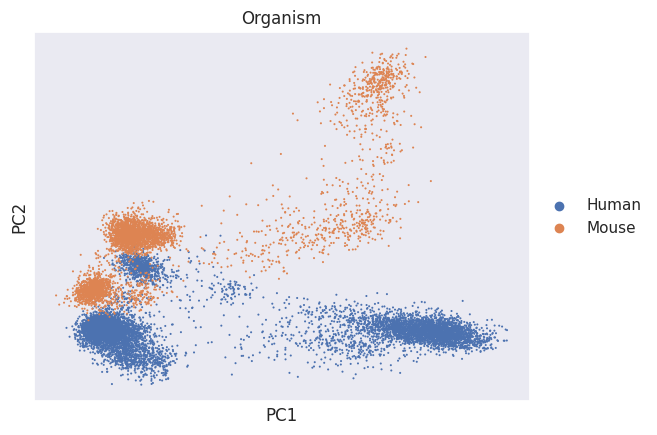

In [ ]:
sc.pl.pca(merged_adata, color='Organism', components='1,2')

A perfect division according to the species
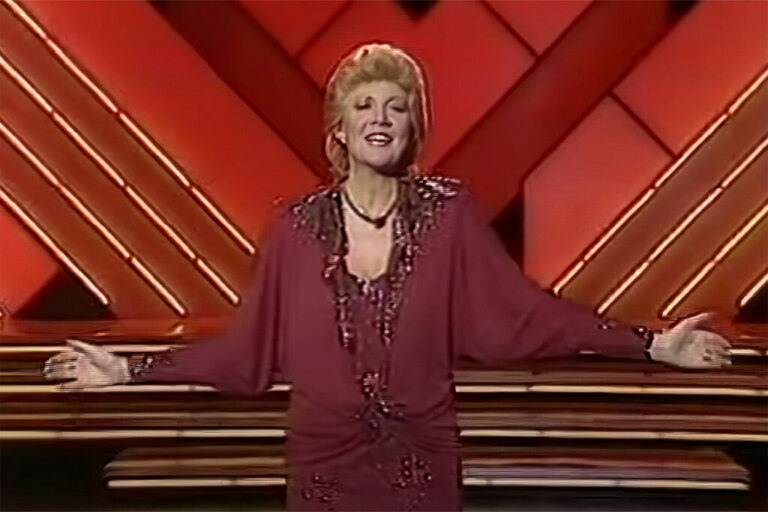

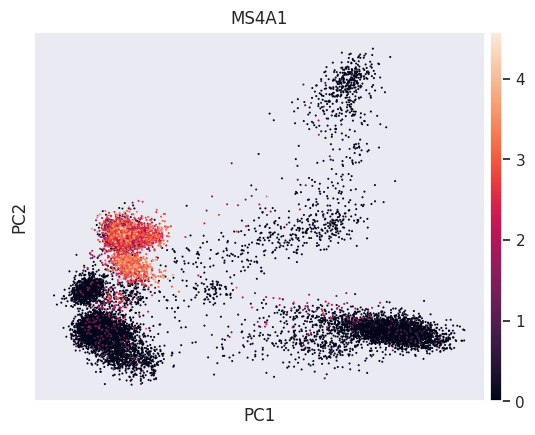

In [ ]:
sc.pl.pca(merged_adata, color='MS4A1', components='1,2')

In [ ]:
# Building a KNN-graph
sc.pp.neighbors(merged_adata, n_pcs=30, n_neighbors=20)

In [ ]:
# Clustering and UMAP
sc.tl.umap(merged_adata)
sc.tl.leiden(merged_adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


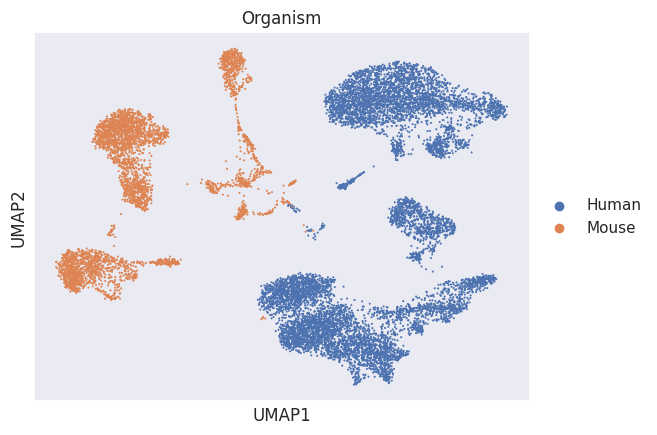

In [ ]:
sc.pl.umap(merged_adata, color="Organism")

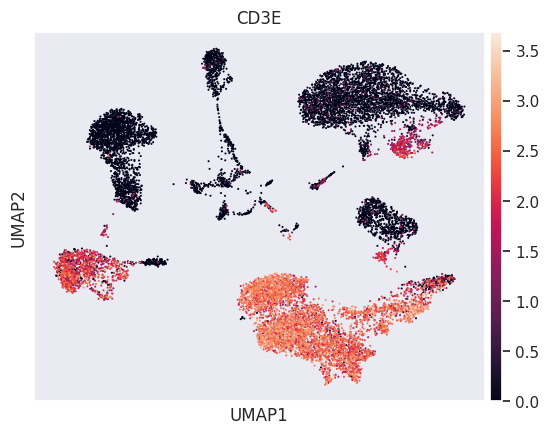

In [ ]:
sc.pl.umap(merged_adata, color="CD3E")

# Batch effect correction

### bbknn

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


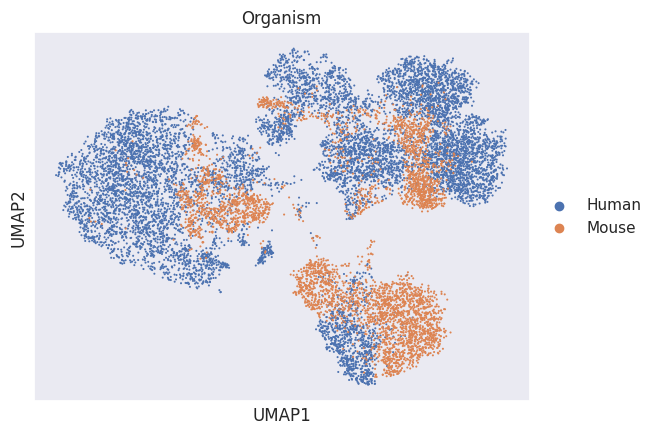

In [ ]:
bbknn.bbknn(merged_adata, batch_key='Organism')
sc.tl.umap(merged_adata)
sc.tl.leiden(merged_adata)
sc.pl.umap(merged_adata, color="Organism")

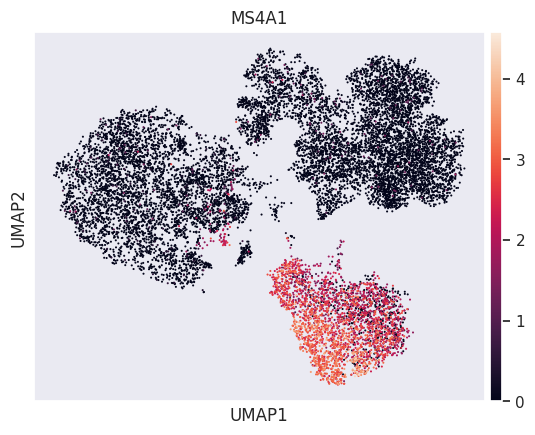

In [ ]:
sc.pl.umap(merged_adata, color="MS4A1")

Let's see what harmony can do

### harmony + bbknn

In [ ]:
# use harmony
sce.pp.harmony_integrate(merged_adata, key="Organism", basis="X_pca", max_iter_harmony=20)

2023-12-13 19:16:02,926 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2023-12-13 19:16:08,519 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2023-12-13 19:16:08,624 - harmonypy - INFO - Iteration 1 of 20
INFO:harmonypy:Iteration 1 of 20
2023-12-13 19:16:14,967 - harmonypy - INFO - Iteration 2 of 20
INFO:harmonypy:Iteration 2 of 20
2023-12-13 19:16:20,616 - harmonypy - INFO - Iteration 3 of 20
INFO:harmonypy:Iteration 3 of 20
2023-12-13 19:16:27,458 - harmonypy - INFO - Iteration 4 of 20
INFO:harmonypy:Iteration 4 of 20
2023-12-13 19:16:32,987 - harmonypy - INFO - Iteration 5 of 20
INFO:harmonypy:Iteration 5 of 20
2023-12-13 19:16:40,026 - harmonypy - INFO - Converged after 5 iterations
INFO:harmonypy:Converged after 5 iterations


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


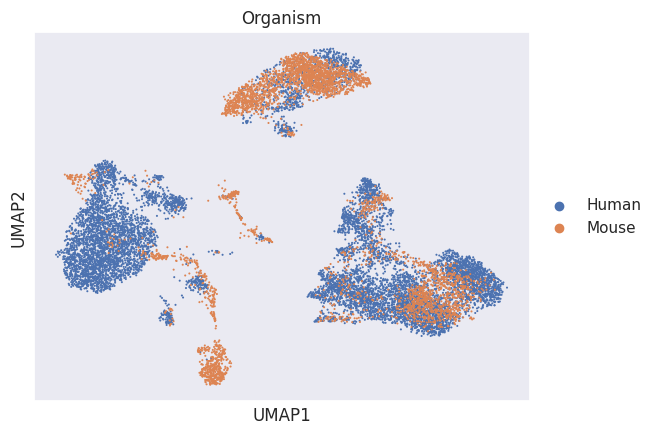

In [ ]:
sc.pp.neighbors(merged_adata, n_pcs=30, n_neighbors=20, use_rep="X_pca_harmony")
sc.tl.umap(merged_adata)
sc.tl.leiden(merged_adata)
sc.pl.umap(merged_adata, color="Organism")

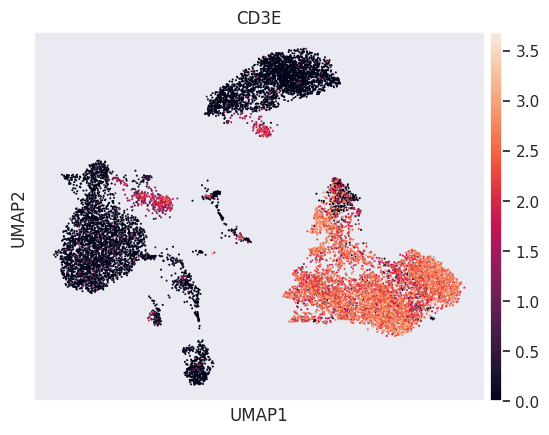

In [ ]:
sc.pl.umap(merged_adata, color="CD3E")

And then use bbknn again with harmony coordinates

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


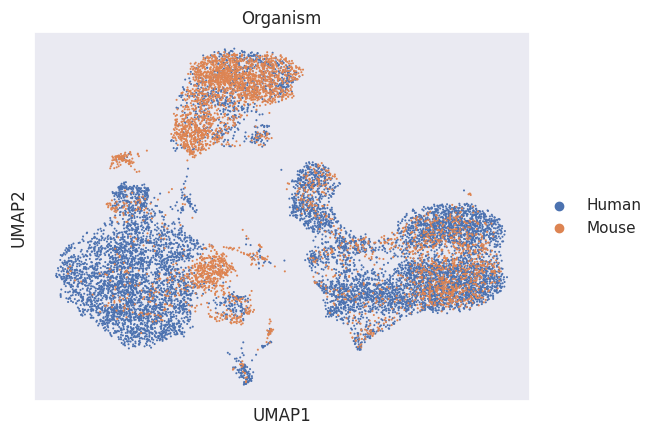

In [ ]:
bbknn.bbknn(merged_adata, use_rep='X_pca_harmony' , batch_key='Organism')
sc.tl.umap(merged_adata)
sc.tl.leiden(merged_adata)
sc.pl.umap(merged_adata, color="Organism")

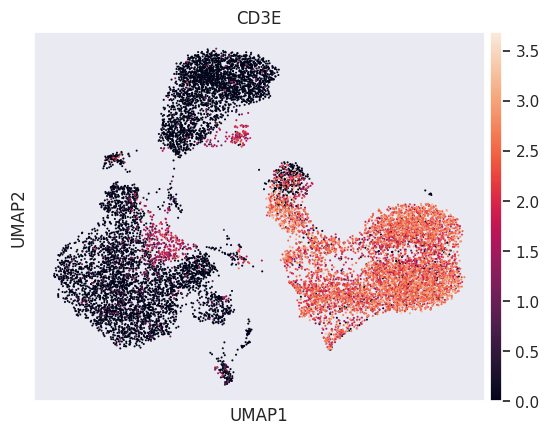

In [ ]:
sc.pl.umap(merged_adata, color="CD3E")

Looks better

In [ ]:
merged_adata

AnnData object with n_obs × n_vars = 14792 × 12936
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Organism', 'batch', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'feature_types', 'mt', 'gene_ids-0', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'ortholog_human-0', 'gene_ids-1', 'genome-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'ortholog_mouse-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg', 'Organism_colors', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    obsp: 'distances', 'connectivities'

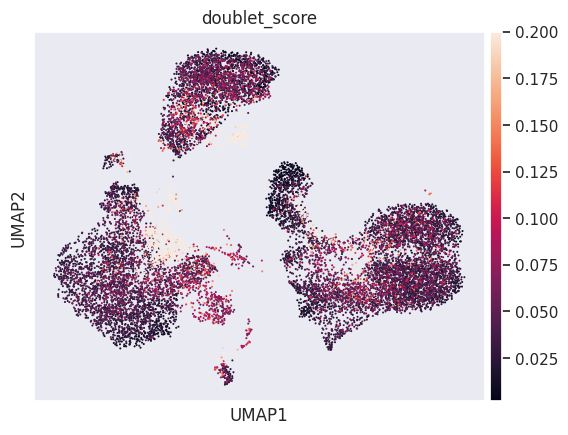

In [ ]:
# Visualize the doublets
sc.pl.umap(merged_adata, color="doublet_score", vmax=0.2)

In [ ]:
merged_adata.obs

n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACATAACTCG-1-0               4803       22575.0           1204.0   
AAACCCACATGTAACC-1-0               2233        7758.0            686.0   
AAACCCAGTGAGTCAG-1-0               4324       21733.0           1374.0   
AAACGAACAGTCAGTT-1-0               4143       15311.0           1211.0   
AAACGAACATTCGGGC-1-0               2332       10013.0            779.0   
...                                 ...           ...              ...   
TTTGTTGGTCGCGTCA-1-1               1087        2888.0            144.0   
TTTGTTGGTGCCAAGA-1-1                952        2186.0            130.0   
TTTGTTGTCCCATTCG-1-1                797        1755.0             25.0   
TTTGTTGTCGTTACCC-1-1               3661       20248.0           1315.0   
TTTGTTGTCTGAACGT-1-1               1035        2575.0            125.0   

                      pct_counts_mt Organism  doublet_score  \
AAACCCACATAACTCG-1-0       5.333333    Human       0.321429   
AAACCCACATGTAACC-1-0       8.842485    Human       0.010608   
AAACCCAGTGAGTCAG-1-0       6.322183    Human       0.022547   
AAACGAACAGTCAGTT-1-0       7.909347    Human       0.252236   
AAACGAACATTCGGGC-1-0       7.779886    Human       0.060674   
...                             ...      ...            ...   
TTTGTTGGTCGCGTCA-1-1       4.986149    Mouse       0.028691   
TTTGTTGGTGCCAAGA-1-1       5.946935    Mouse       0.043709   
TTTGTTGTCCCATTCG-1-1       1.424501    Mouse       0.012083   
TTTGTTGTCGTTACCC-1-1       6.494469    Mouse       0.035988   
TTTGTTGTCTGAACGT-1-1       4.854369    Mouse       0.013740   

                      predicted_doublet batch leiden     n_counts  
AAACCCACATAACTCG-1-0               True     0     11  3308.653564  
AAACCCACATGTAACC-1-0              False     0      1  2415.239014  
AAACCCAGTGAGTCAG-1-0              False     0      9  3176.041748  
AAACGAACAGTCAGTT-1-0               True     0     17  3365.373779  
AAACGAACATTCGGGC-1-0              False     0      2  2258.305664  
...                                 ...   ...    ...          ...  
TTTGTTGGTCGCGTCA-1-1              False     1      0  1851.447632  
TTTGTTGGTGCCAAGA-1-1              False     1      1  1793.196777  
TTTGTTGTCCCATTCG-1-1              False     1     14  1641.412231  
TTTGTTGTCGTTACCC-1-1              False     1      5  2952.023682  
TTTGTTGTCTGAACGT-1-1              False     1      0  1849.786499  

[14441 rows x 10 columns]

In [ ]:
# remove the doublets
merged_adata_2 = merged_adata[merged_adata.obs.predicted_doublet == False]

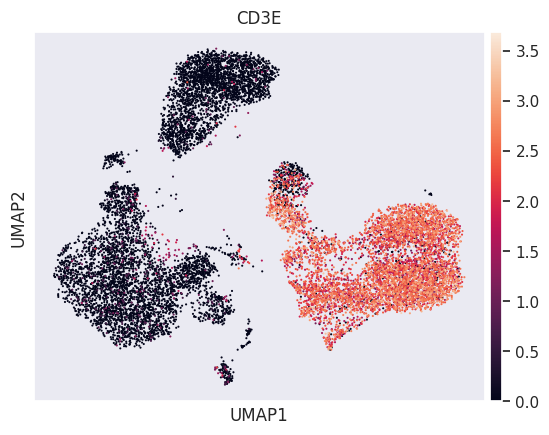

In [ ]:
sc.pl.umap(merged_adata_2, color="CD3E")

# Annotation

MS4A1 - B-cells  
CD3E - T-cells, NK-cells  
NKG7 - NK-cells  
CD4 - monocytes, DC, T-cells  
CD8A - T-cells  
CD14 - monocytes, macrophages  


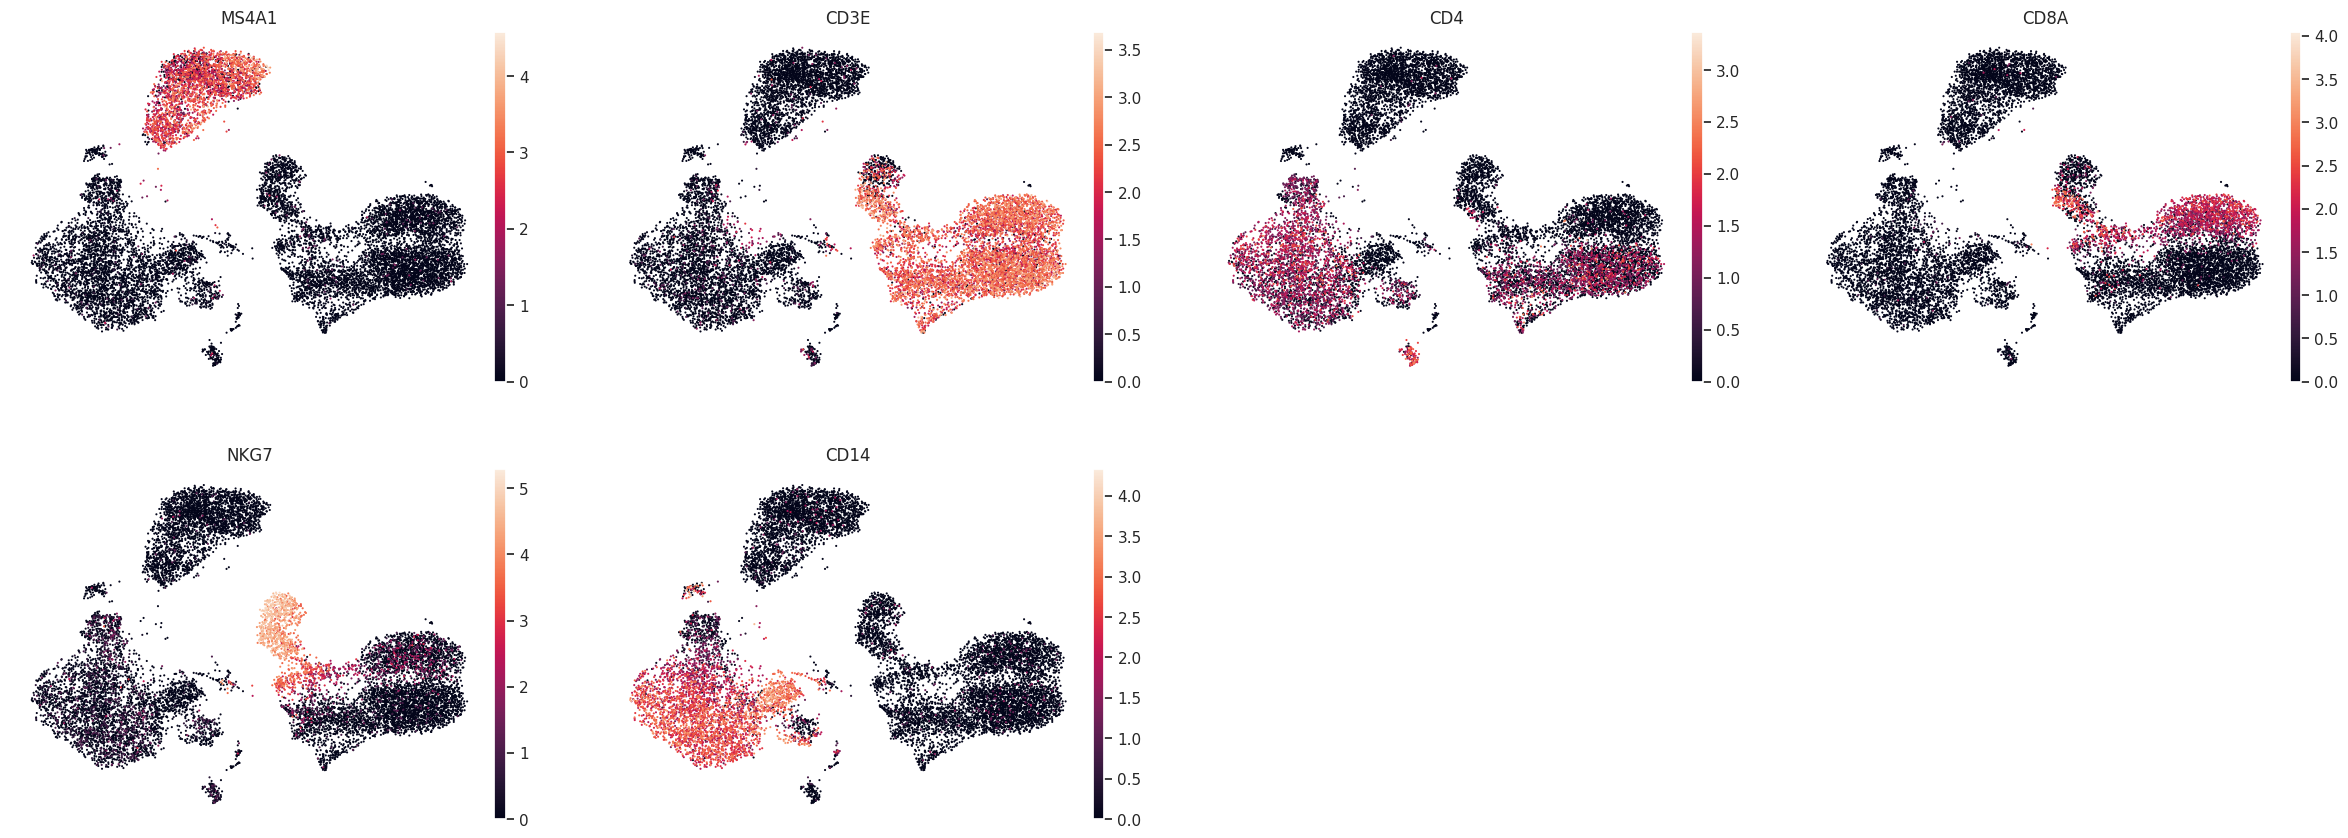

In [ ]:
sc.pl.umap(merged_adata_2, color=["MS4A1", "CD3E", "CD4", "CD8A", "NKG7", "CD14"], frameon=False)

MZB1 - B-cells, **plasma cells**, plasmacytoid dendritic cells (pDCs)   
CD19 - **B-cells**, plasma cells  
IRF4 - DC  
ITGA2B - erythroid cells   
SELP - activated platelets

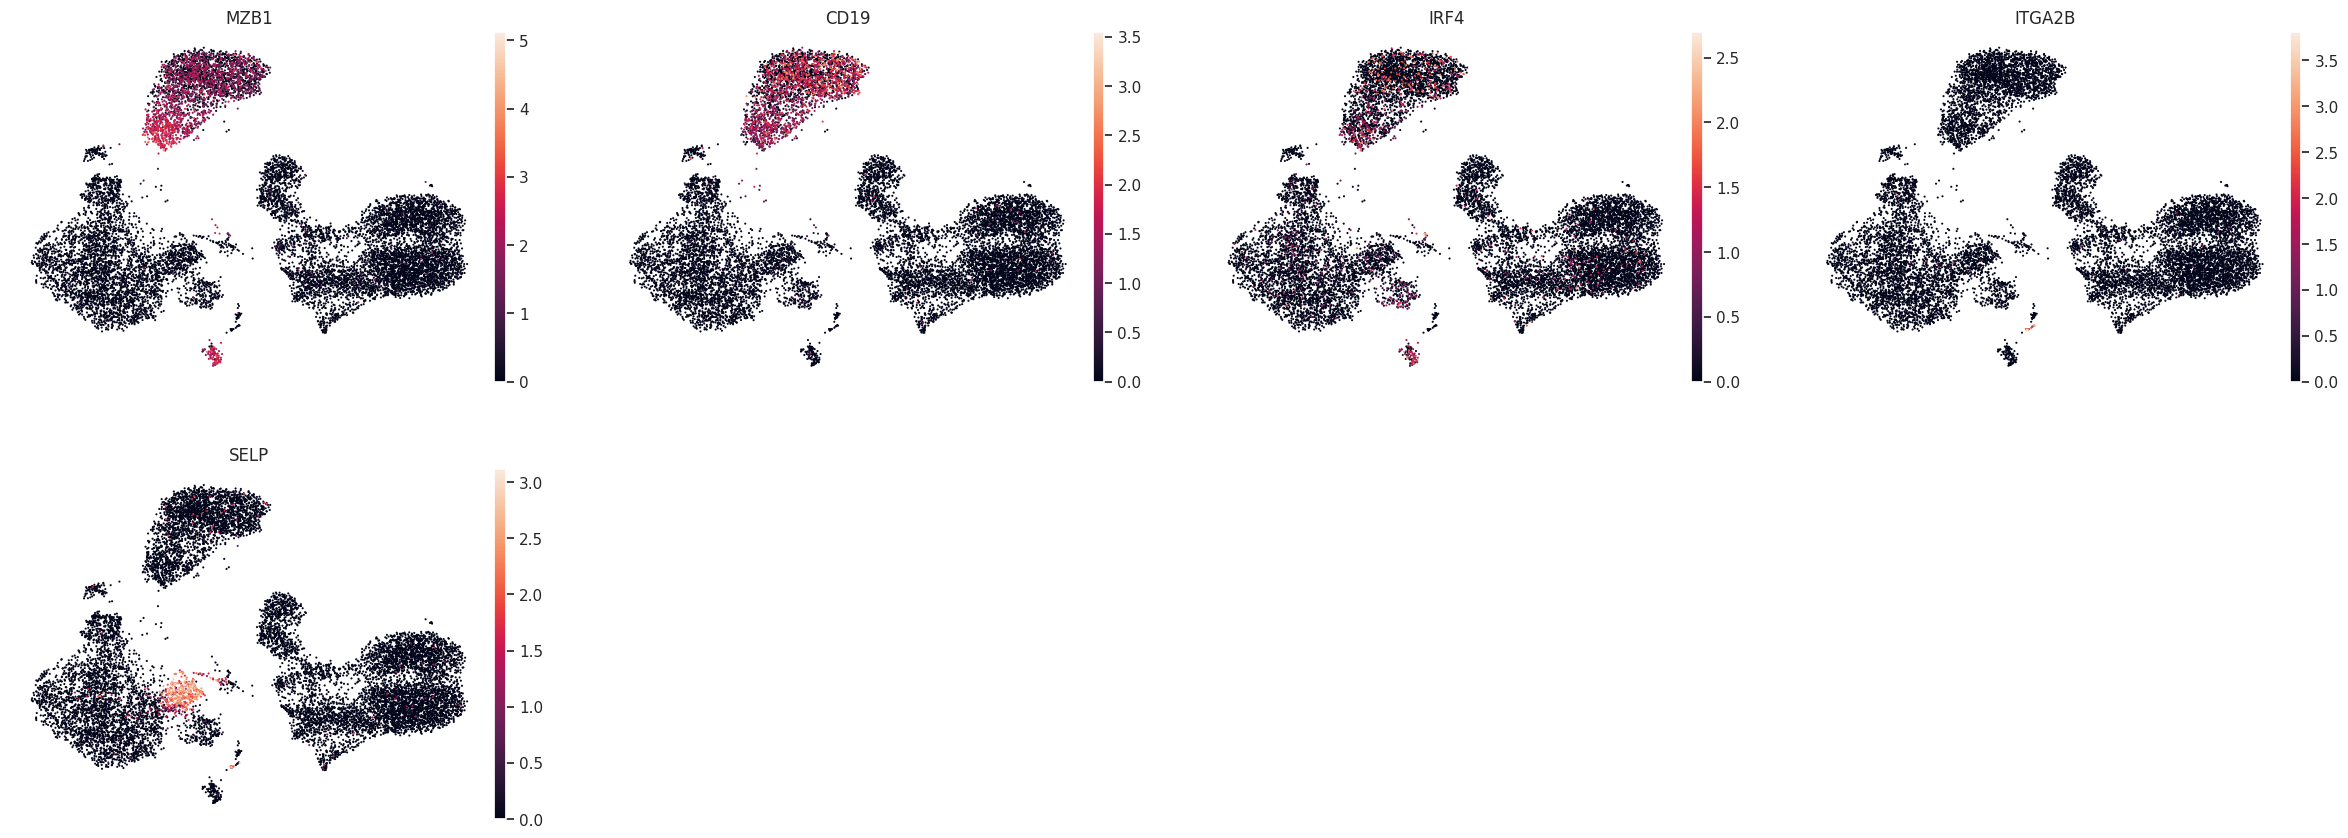

In [ ]:
sc.pl.umap(merged_adata_2, color=["MZB1", 'CD19', "IRF4", "ITGA2B", "SELP"], frameon=False)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


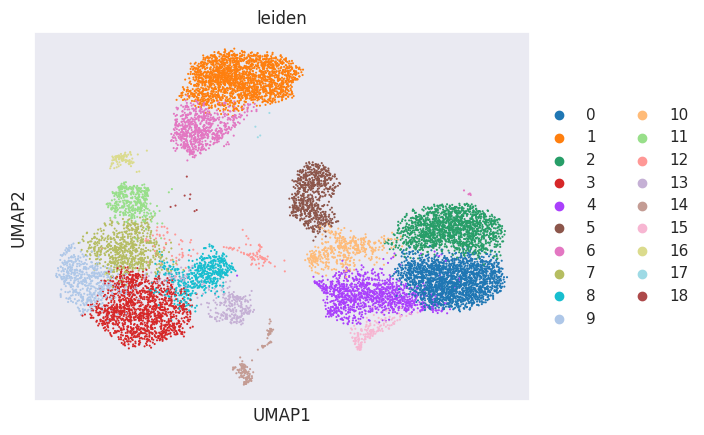

In [ ]:
sc.pl.umap(merged_adata_2, color="leiden")

### Annotation using reference

In [ ]:
!pip install scanpy[leiden] symphonypy

In [ ]:
import symphonypy as sp
adata_reference = sp.datasets.pbmcs_10x_reference()

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
sc.pl.umap(adata_reference, color="cell_type")

In [ ]:
sp.tl.map_embedding(merged_adata_2, adata_reference, key="Organism")
sp.tl.per_cell_confidence(merged_adata_2, adata_reference)
sp.tl.transfer_labels_kNN(merged_adata_2, adata_reference, ref_labels=["cell_type"])

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


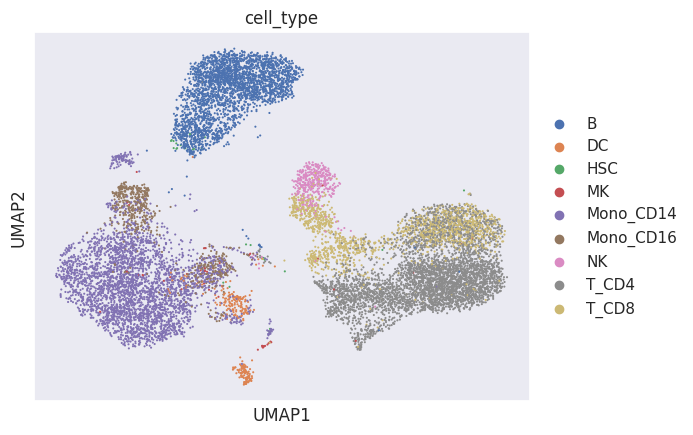

In [ ]:
sc.pl.umap(merged_adata_2, color="cell_type")

# Differential expression

In [ ]:
sc.tl.rank_genes_groups(merged_adata_2, groupby='Organism')

In [ ]:
sc.tl.filter_rank_genes_groups(merged_adata_2, min_fold_change=3)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


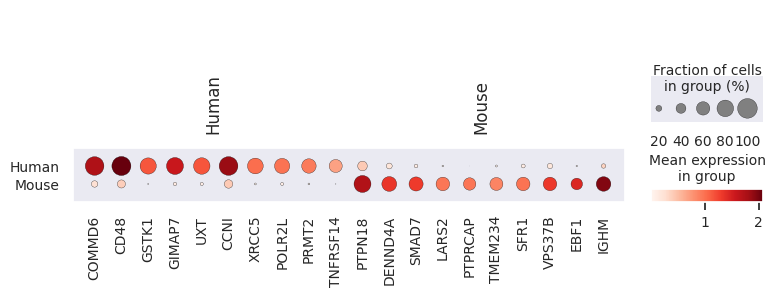

In [ ]:
sc.pl.rank_genes_groups_dotplot(merged_adata_2, key='rank_genes_groups_filtered')

In [ ]:
mouse = sc.get.rank_genes_groups_df(merged_adata_2, group='Mouse')

In [ ]:
mouse_sign = mouse[((mouse.logfoldchanges > 3) | (mouse.logfoldchanges < -3)) & (mouse.pvals_adj < 0.001) ]

In [ ]:
mouse_sign

names     scores  logfoldchanges  pvals  pvals_adj
9       PTPN18  62.195629        3.011763    0.0        0.0
17     DENND4A  56.530758        3.791068    0.0        0.0
22       LARS2  54.892319        5.602683    0.0        0.0
24       SMAD7  53.915096        4.464159    0.0        0.0
28        IGHM  51.482960        3.889938    0.0        0.0
...        ...        ...             ...    ...        ...
12929     CCNI -73.023186       -3.312812    0.0        0.0
12931   COMMD6 -76.265976       -3.990337    0.0        0.0
12932     CD48 -78.684891       -3.779201    0.0        0.0
12933   MYL12A -78.906815       -3.042377    0.0        0.0
12935      B2M -94.334251       -3.605654    0.0        0.0

[904 rows x 5 columns]

In [ ]:
human = sc.get.rank_genes_groups_df(merged_adata_2, group='Human')

In [ ]:
human_sign = mouse[((human.logfoldchanges > 3) | (human.logfoldchanges < -3)) & (human.pvals_adj < 0.001) ]

In [ ]:
human_sign

names     scores  logfoldchanges  pvals  pvals_adj
0       RPL23  79.687271        2.065403    0.0        0.0
2         UBB  75.257912        1.990155    0.0        0.0
3         FAU  74.833809        1.275822    0.0        0.0
4       RPS20  73.224693        1.819754    0.0        0.0
6      SHISA5  66.788750        2.860869    0.0        0.0
...       ...        ...             ...    ...        ...
12907   TOMM7 -58.525051       -2.023733    0.0        0.0
12911  POLR2L -59.060989       -4.232615    0.0        0.0
12913   EEF1G -59.193020       -1.672633    0.0        0.0
12918    SSR2 -62.569733       -2.900848    0.0        0.0
12926   GSTK1 -69.553574       -7.005420    0.0        0.0

[904 rows x 5 columns]